# Pymaceuticals Inc.
---

### Analysis

- There seems to be a varying level of effectivness between the drugs used to treat the tumors, with Ramicane and Capomulin being the most effective over the course of treatment. This corresponds with the number of treatment plans that include these drugs. It could be that due to a larger sample size there is a higher effective rate, or that its a know factor that they work the best for the majority of cases and they are perscribed at a higher rate.
 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice. & getting info on data
# print(mouse_metadata.shape)

# print(study_results.shape)

# print(df.shape)

# df.info()

df["Mouse ID"].nunique()


249

In [9]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending = False).head(10)


Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
dtype: int64

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_mask = df["Mouse ID"] == "g989"
df.loc[mouse_mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_mask = df["Mouse ID"] != "g989"
df2 = df.loc[mouse_mask].reset_index(drop=True)
df2.shape

(1880, 8)

In [13]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tmean = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tmedian = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tvar = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tstd = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tsem = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

sum_data = {
    "Tumor Average": tmean,
    "Tumor Median": tmedian,
    "Tumor Variance": tvar,
    "Tumor Std. Dev.": tstd,
    "Tumor Volume Std. Err.": tsem
}

sum_df = pd.DataFrame(sum_data).reset_index()
sum_df

,Drug Regimen,Tumor Average,Tumor Median,Tumor Variance,Tumor Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [17]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
cols_agg = {
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
}
sum_df2 = df2.groupby(["Drug Regimen"]).agg(cols_agg).reset_index()
sum_df2



Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

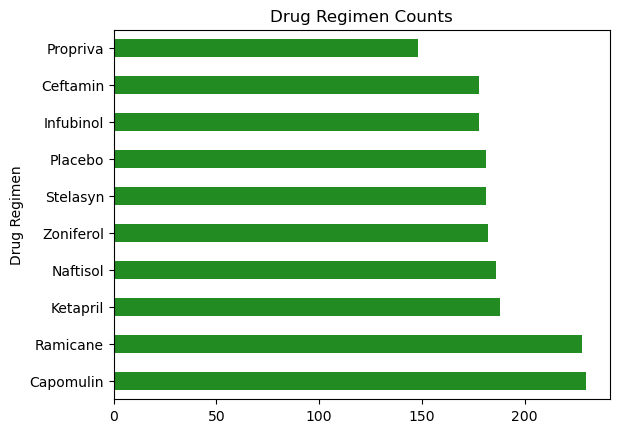

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
df2["Drug Regimen"].value_counts().plot(kind = "barh", title = "Drug Regimen Counts", color = "forestgreen")
plt.show()

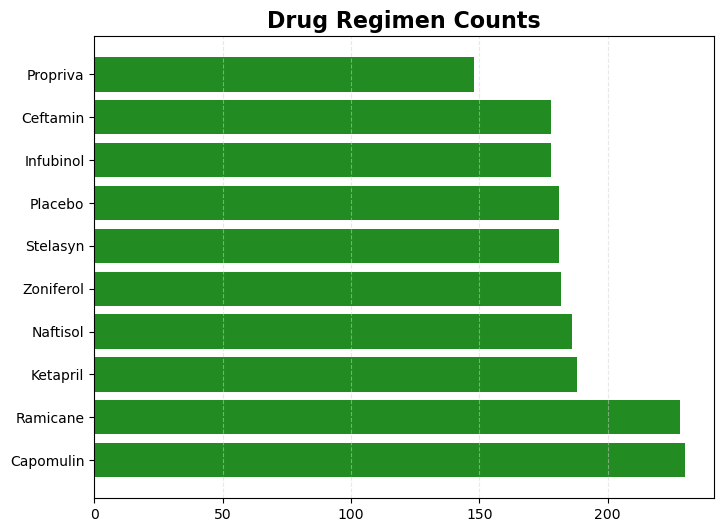

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data = df2["Drug Regimen"].value_counts()
x = data.index
y = data.values
# Step 2: Create the Canvas
plt.figure(figsize=(8,6))
# Step 3: Create the skeleton plot
plt.barh(x, y, color="forestgreen")
plt.title("Drug Regimen Counts", fontsize=16, fontweight="bold")
plt.grid(axis="x", color="lightgrey", linestyle="--", alpha=0.5)
plt.show()

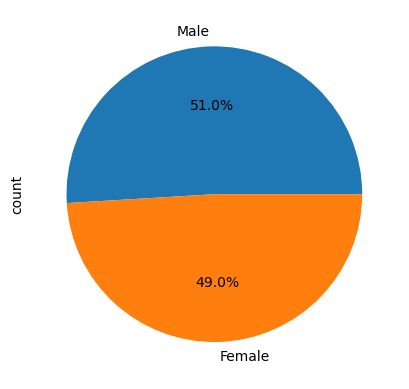

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count = df2.Sex.value_counts()
count.plot(kind = "pie", autopct = '%1.1f%%')
plt.show()



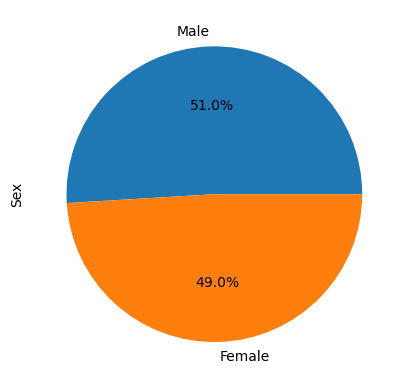

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count = df2.Sex.value_counts()
plt.pie(count.values, labels=count.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [62]:
import seaborn as sns

In [73]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
merged_df = df2.groupby("Mouse ID").Timepoint.max().reset_index()
sub = df2.loc[:,["Mouse ID","Timepoint","Drug Regimen", "Tumor Volume (mm3)"]]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df2 = pd.merge(merged_df, sub , on=["Mouse ID", "Timepoint"])

mask = merged_df2["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
merged_df2 = merged_df2.loc[mask].reset_index(drop=True)

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a275,45,Ceftamin,62.999356
3,a411,45,Ramicane,38.407618
4,a444,45,Ramicane,43.047543
...,...,...,...,...
95,y769,45,Ceftamin,68.594745
96,y793,45,Capomulin,31.896238
97,y865,45,Ceftamin,64.729837
98,z578,45,Ramicane,30.638696


Text(0.5, 1.0, 'Final Tumor Volum per drug')

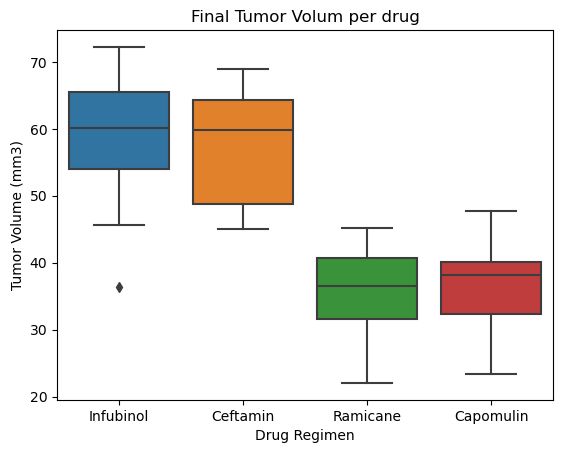

In [77]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
sns.boxplot(data=merged_df2, x="Drug Regimen", y = "Tumor Volume (mm3)")
plt.title("Final Tumor Volum per drug")

In [88]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df2.loc[merged_df2["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f'({drug} potential outliers: {outliers})')



(Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64)
(Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))


## Line and Scatter Plots

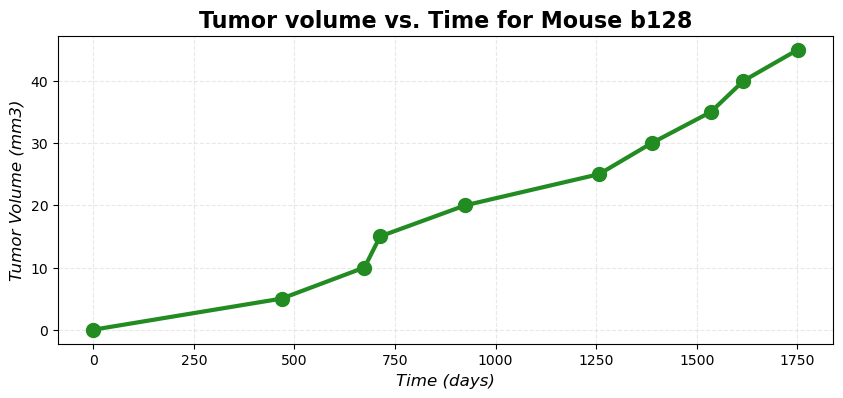

In [91]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df2.loc[df2["Drug Regimen"] == "Capomulin"]

mouse = "b128"

# Step 1: Get the data
data = df2.loc[df2["Mouse ID"] == mouse]
time = data["Timepoint"]
y =data ["Tumor Volume (mm3)"]

# Step 2: Initialize the canvas
plt.figure(figsize=(10, 4))

# Step 3: Vanilla graph (aka a BLAND graph) or a skeleton graph
plt.plot(time, color="forestgreen", linewidth=3, marker="o", markersize=10)

# Step 4: Customize the graph
plt.xlabel("Time (days)", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title(f"Tumor volume vs. Time for Mouse {mouse}" , fontsize=16, fontweight="bold")

plt.grid(color="lightgrey", linestyle="--", alpha=0.5)


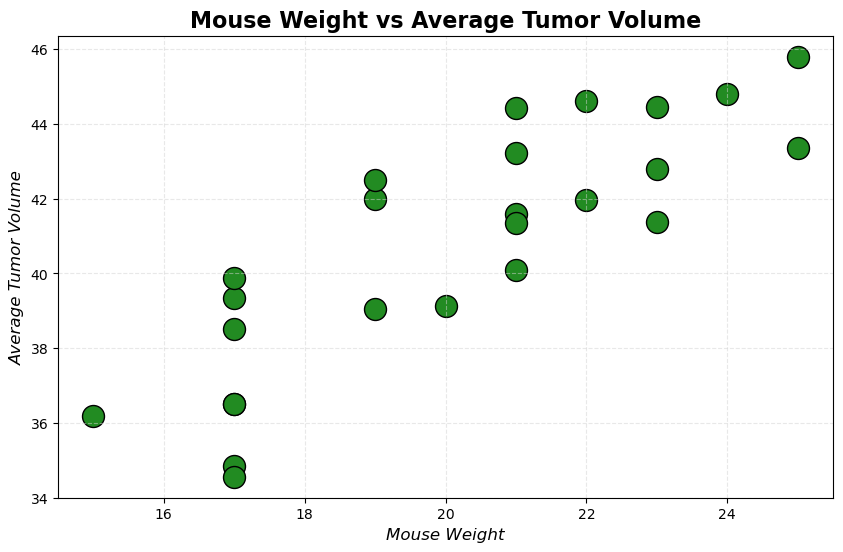

In [94]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
data = df2.loc[df2["Drug Regimen"] == "Capomulin"]

scatter_df = data.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)" : "mean"}).reset_index()
x= scatter_df["Weight (g)"]
y = scatter_df["Tumor Volume (mm3)"]

plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x , y , facecolor="forestgreen", edgecolor="black", s=250)

# Step 4: Customizations
plt.xlabel("Mouse Weight", fontsize=12, fontstyle="italic")
plt.ylabel("Average Tumor Volume", fontsize=12, fontstyle="italic")
plt.title("Mouse Weight vs Average Tumor Volume", fontweight="bold", fontsize=16)



plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.show()

## Correlation and Regression

In [98]:
#regression/modelling libraries
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [99]:
corrs = scatter_df.corr(numeric_only = True)
corrs

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


The r-squared is: 0.7088568047708723


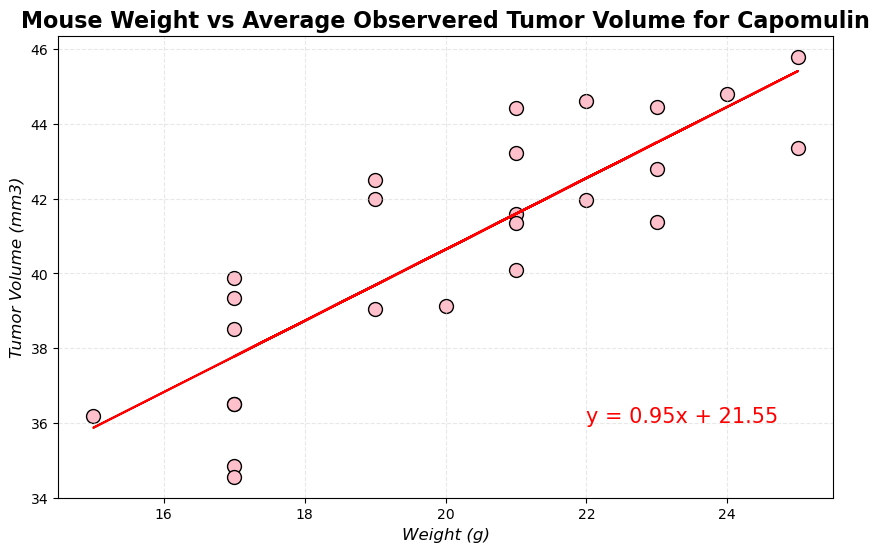

In [102]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = scatter_df["Weight (g)"]
y_values = scatter_df["Tumor Volume (mm3)"]

# makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make the plot
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x_values, y_values, facecolor="pink", edgecolor="black", s=100)
plt.plot(x_values, regress_values, "r-") # plot the line of best fit

# Step 4: Customizations
plt.xlabel("Weight (g)", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title("Mouse Weight vs Average Observered Tumor Volume for Capomulin", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(22, 36),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()